# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [4]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [34]:
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("house_prices.csv")

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Creating TotalSF variable as sum of all SF in house.

In [28]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Taking all numerical fields available

In [35]:
df.columns[df.dtypes==int64]

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'TotalSF'],
      dtype='object')

In [54]:
X = df [[ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]

In [41]:
y = df['SalePrice']

## Exploring the data

In [44]:
#descriptive statistics summary
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [51]:
X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,2567.048630,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,821.714421,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,2009.500000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,2474.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,3004.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,11752.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


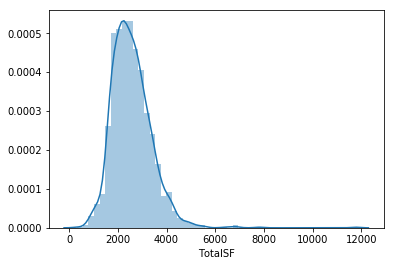

In [58]:
var = 'TotalSF'
sns.distplot(X[var]);

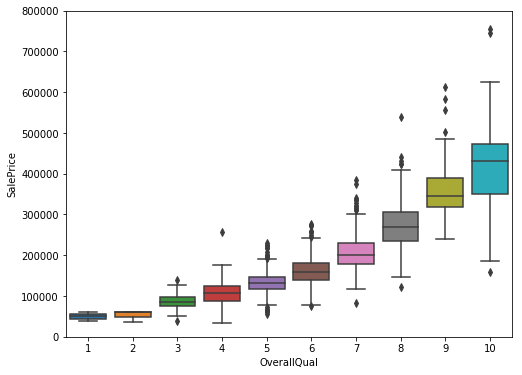

In [61]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([y, X[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

We can see a linear positive relation between SalePrice and OverallQual that makes sense.

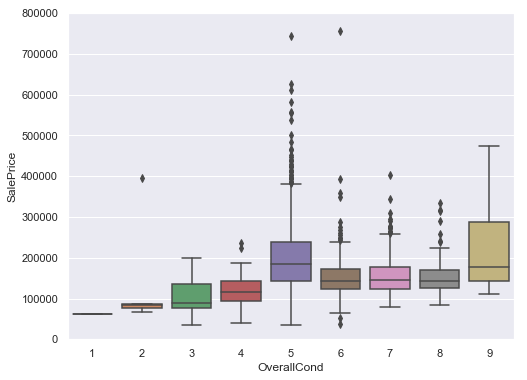

In [169]:
#box plot overallqual/saleprice
var = 'OverallCond'
data = pd.concat([y, X[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

OverallCond does not look as clear as OverallQual.

### Checking your target distribution

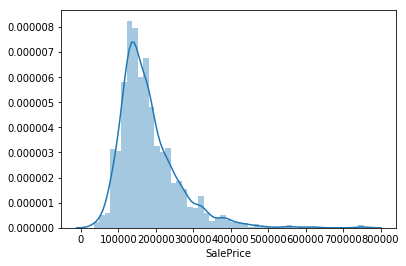

In [48]:
sns.distplot(y);

In [49]:
#skewness for normal distribution is 0
print("Skewness: %f" % y.skew())

Skewness: 1.882876


Check correlation matrix with heatmap to better understan variable relations. Specially with targer (SalePirce)

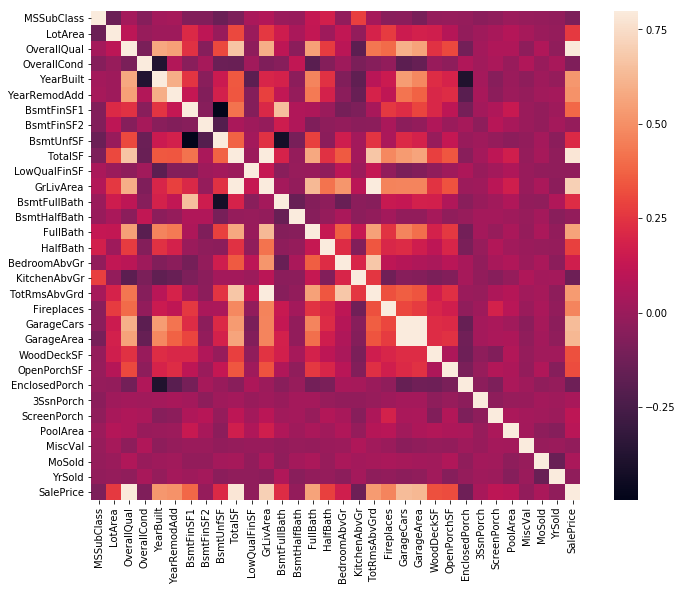

In [67]:
#correlation matrix
corrmat = pd.concat([X,y],axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Strongest correlations with SalePrice found for: 'OverallQual', 'TotalSF','GrLivArea'.
    
Note that GrLivArea abd TotRmsAbvGrd are srongly correlated with TotalSF, so maybe we could skip these variables in order to avoid multicollinearity.

Let's zoom in for the top 10 variables (correlated with SalePrice):

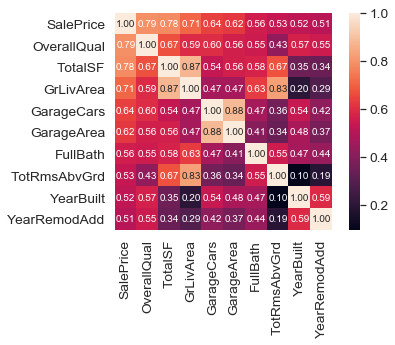

In [74]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(pd.concat([X,y],axis=1)[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Now, we have pointed out the input variables stronger correlated with target.

Let analyze in more detail some of these variables with pairplot.

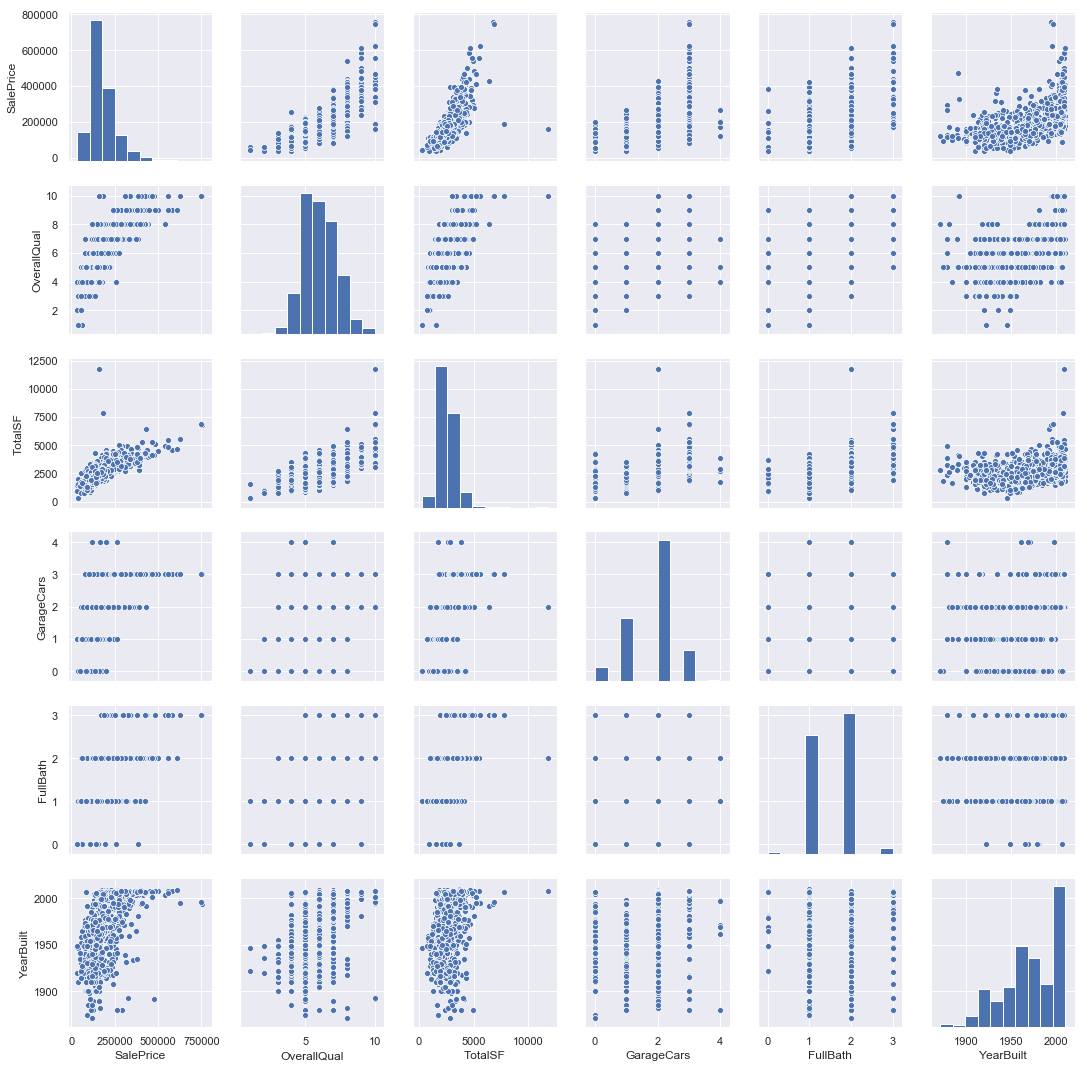

In [78]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'TotalSF', 'GarageCars', 'FullBath', 'YearBuilt']
sns.pairplot(pd.concat([X,y],axis=1)[cols], size = 2.5)
plt.show();

## Missing data

Checking for missing values and imputation if needed.

In [79]:
#missing data
total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
YrSold,0,0.0
FullBath,0,0.0
LotArea,0,0.0
OverallQual,0,0.0
OverallCond,0,0.0
YearBuilt,0,0.0
YearRemodAdd,0,0.0
BsmtFinSF1,0,0.0
BsmtFinSF2,0,0.0
BsmtUnfSF,0,0.0


No numerical data is missing! :)

# Scaling

Let's explore how our input data would look like after StandardScaler is applied.

In [171]:
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [172]:
XsFeatures=scaler.transform(X)

In [173]:
Xs = pd.DataFrame(XsFeatures, index=X.index, columns=X.columns)

In [174]:
Xs.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-1.504124e-16,-4.202783e-17,-7.680310e-17,3.692632e-16,1.032983e-15,4.518912e-15,1.505645e-17,1.653168e-16,-7.376139e-17,-2.424431e-16,...,-2.022735e-17,2.190029e-16,3.357284e-17,1.379034e-16,-4.005738e-16,1.199193e-16,-7.945889e-16,2.409602e-16,-6.395189e-17,3.566101e-14
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.718479e+00,...,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00
25%,-8.725628e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-6.787512e-01,...,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01
50%,-1.631095e-01,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.132760e-01,...,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01
75%,3.098594e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.319380e-01,...,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01
max,3.147673e+00,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.118162e+01,...,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01,2.100892e+00,1.645210e+00


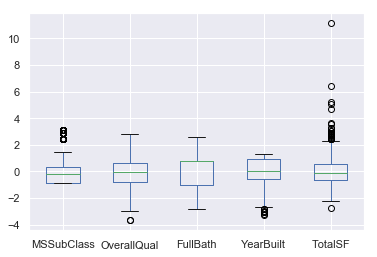

In [185]:
Xs[['MSSubClass', 'OverallQual', 'FullBath','YearBuilt',
       'TotalSF']].plot.box()

# Let's create Pipeline and try ML models

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

### 1) Pipeline with Linear Regression

In [107]:
steps = [('scaler', StandardScaler()), ('LinearReg', LinearRegression())]
pipeline01 = Pipeline(steps) # define the pipeline object.

In [108]:
cross_val_score(pipeline01,X,y,cv=5,scoring='neg_mean_absolute_error').mean()

-22003.646725054394

### 2) Pipeline with Decission Tree

In [188]:
steps = [('scaler', StandardScaler()), ('DecTree', DecisionTreeRegressor())]
pipeline2 = Pipeline(steps) # define the pipeline object.

Because we do not know yet which parameters are the best for DecTree, we need to explore it with GridSearchCV.

**Note that, in pipeline object now we have more parameters available for each step, so naming convention changes a bit (see below)**

In [189]:
parameters = {'DecTree__max_depth':[5,10,15,20,30,50],'DecTree__min_samples_leaf':[5,10,20,50]}

In [190]:
dtr = GridSearchCV(pipeline2,cv=5,param_grid=parameters,
                   scoring='neg_mean_absolute_error')

In [191]:
dtr.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('DecTree', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'DecTree__max_depth': [5, 10, 15, 20, 30, 50], 'DecTree__min_samples_leaf': [5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [192]:
dtr.best_params_

{'DecTree__max_depth': 10, 'DecTree__min_samples_leaf': 10}

In [193]:
dtr.best_score_

-23156.398195448553

### 3) Pipeline Gradient Booosting Regressor

In [246]:
regGBR = GradientBoostingRegressor(max_depth=3,n_estimators=100,
                                   learning_rate=0.1)

In [247]:
steps = [('scaler', StandardScaler()), ('GBR', regGBR)]
pipeline3 = Pipeline(steps) # define the pipeline object.

In [248]:
parameters = {'GBR__max_depth':[3,10,15],'GBR__min_samples_leaf':[10,20,40]}

In [249]:
gbr = GridSearchCV(pipeline3,cv=5,param_grid=parameters,scoring='neg_mean_absolute_error')

In [250]:
gbr.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('GBR', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
     ...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'GBR__max_depth': [3, 10, 15], 'GBR__min_samples_leaf': [10, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [251]:
gbr.best_params_

{'GBR__max_depth': 10, 'GBR__min_samples_leaf': 20}

In [252]:
gbr.best_score_

-17024.627127943262

## Train your selected model with train data and check metrics on test set

In [253]:
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [254]:
gbr.best_estimator_.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('GBR', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
    ...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))])

In [255]:
# Load the scorer
from sklearn.metrics import mean_absolute_error

In [256]:
mean_absolute_error(gbr.best_estimator_.predict(X_test),y_test)

15224.598610073657

# Save your pipeline with pickle

In [259]:
import pickle

In [260]:
pickle.dump(gbr.best_estimator_,open('bestModel.pickle','wb'))

In [264]:
type(gbr.best_estimator_)

sklearn.pipeline.Pipeline